## Ejercicio de Clasificación

![IA_Risk.jpg](attachment:9477198e-c0ff-4339-86fb-2af37f6810f4.jpg)

En el siguiente ejercicio se presenta un set de datos con el que trataremos de clasificar si un cliente es solvente o no a la hora de devolver un crédito solicitado a una entidad bancaria.

Para ponernos en situación pertenecemos al equipo de Data Science de una entidad bancaria y se no pide realizar un modelo que sea capaz de evaluar el riesgo de un cliente cuando nos solicita un crédito a través de una tarjeta de crédito en base al histórico de datos que os pasan desde el equipo de negocio (datos extraidos de kaggle).

A continuación os dejan una breve explicación de en que consiste cada una de las variables del conjunto de datos:


En el siguiente ejercicio se presenta un set de datos con el que trataremos de clasificar si un cliente es solvente o no a la hora de devolver un crédito solicitado a una entidad bancaria.

Para ponernos en situación pertenecemos al equipo de Data Science de una entidad bancaria y se no pide realizar un modelo que sea capaz de evaluar el riesgo de un cliente cuando nos solicita un crédito a través de una tarjeta de crédito en base al histórico de datos que os pasan desde el equipo de negocio (datos extraidos de kaggle).

A continuación os dejan una breve explicación de en que consiste cada una de las variables del conjunto de datos:

- BAD: 1 = candidato con préstamo incumplido o con mora; 0 = candidato que paga su deuda y no tiene registro negativo
- LOAN: Cantidad de solicitud de préstamo
- MORTDUE: Cantidad adeudada de la hipoteca existente
- VALUE: Valor actual del bien o propiedad
- REASON: DebtCon = consolidación de la deuda; HomeImp = mejoras para el hogar
- JOB: Categorias ocupacionales o profesionales
- YOJ: Años es esu trabajo actual
- DEROG: Número de informes derogados o cancelados importantes
- DELINQ: Número de lineas de crédito morosas
- CLAGE: Antiguedad de la linea de crédito más antigua en meses
- NINQ:Número de consultas crediticas recientes
- CLNO: Número de líneas de crédito
- DEBTINQ: (LOAN + MORTDUE) / VALUE

En este caso la target de nuestro modelo será **BAD**, el resto las consideraremos variables predictoras.

Que se espera que hagais:

- Análisis descriptivo de los datos (esto ayudará a realizar una mejor elección del modelo a usar)
- Tratamiento y limpieza de los datos
- Prueba y evaluación de diferentes modelos
- Breve explicación de los resultados, justificando la elección final del modelo (no me vale con que es el que mejor métrica tenía)
- Que disfruteis del ejercico :).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PROCESAMIENTO DE DATOS:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE 

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('../Data/credit_risk.csv')
backup = df.copy()
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


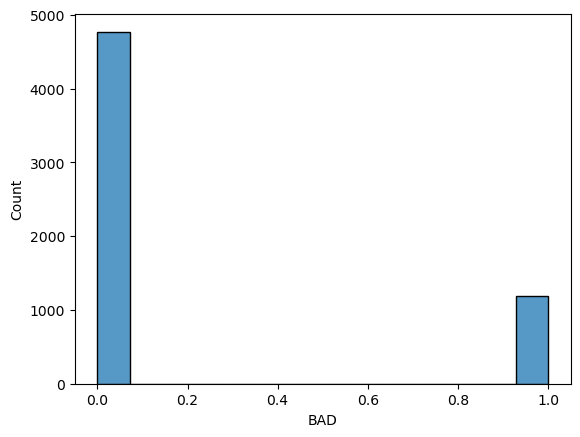

In [367]:
sns.histplot(df["BAD"]) # POR LA TARGET YA SABEMOS QUE USAREMOS UN MODELO DE CLASIFICACIÓN
plt.show() # 1 candidato a préstamo 0 no candidato a préstamo

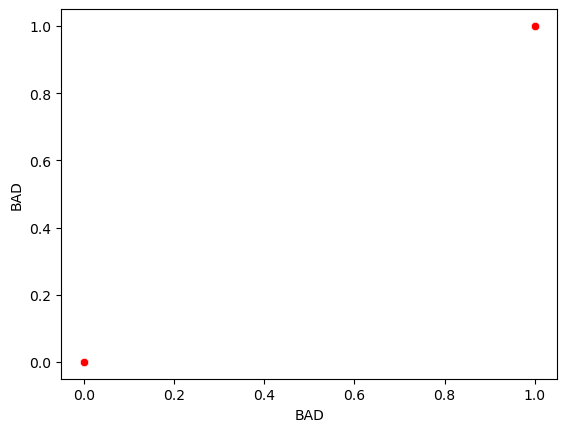

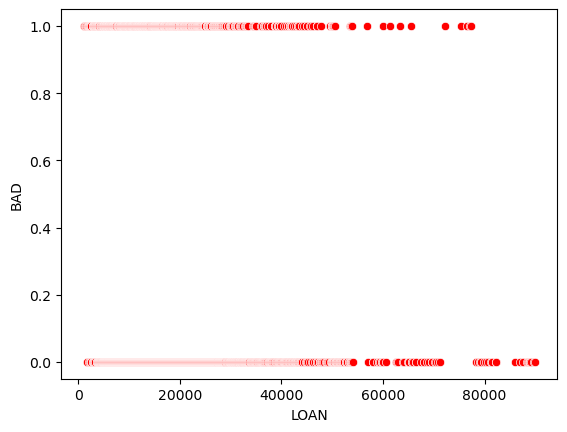

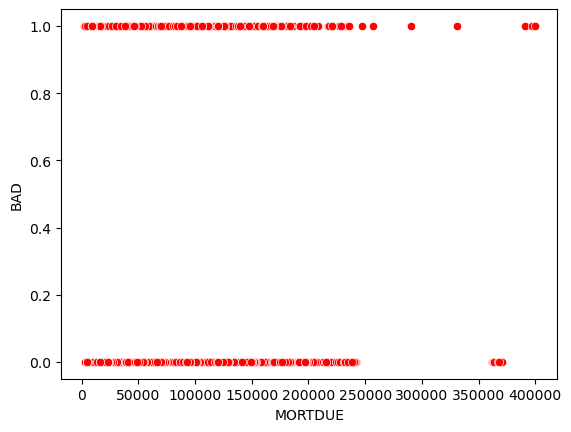

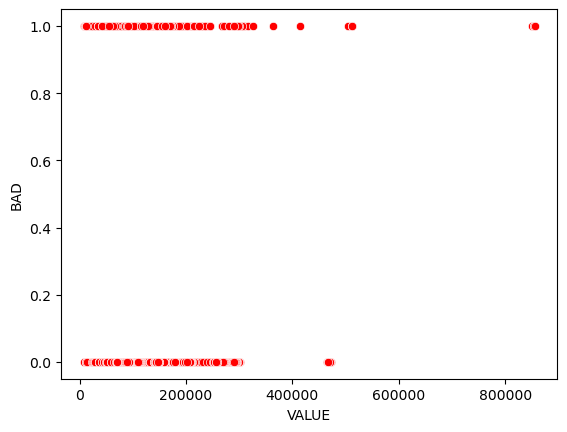

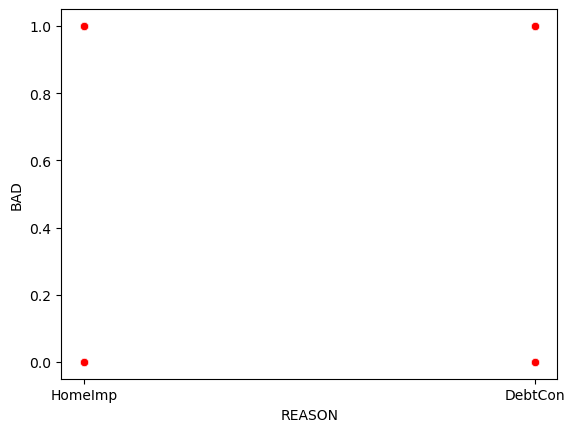

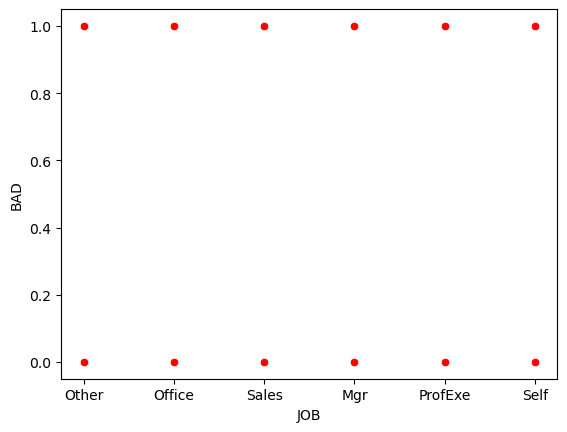

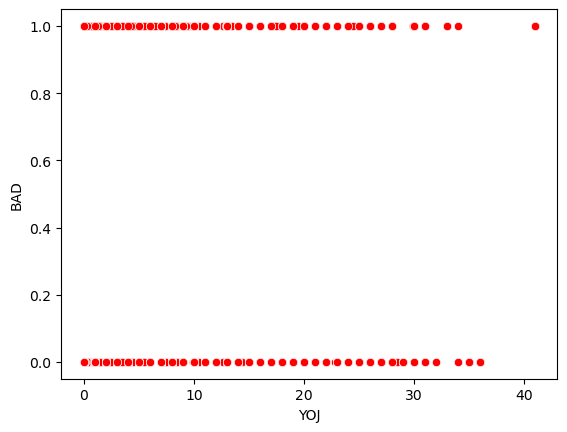

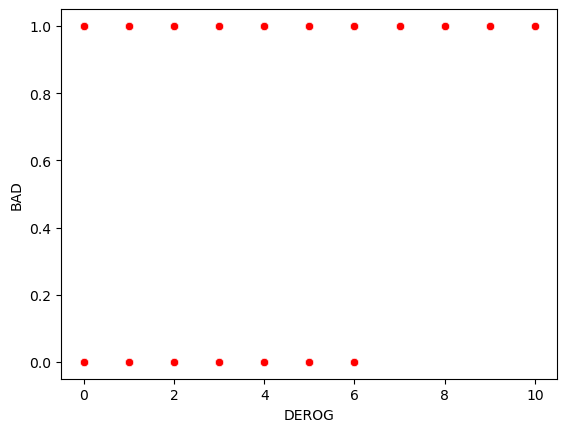

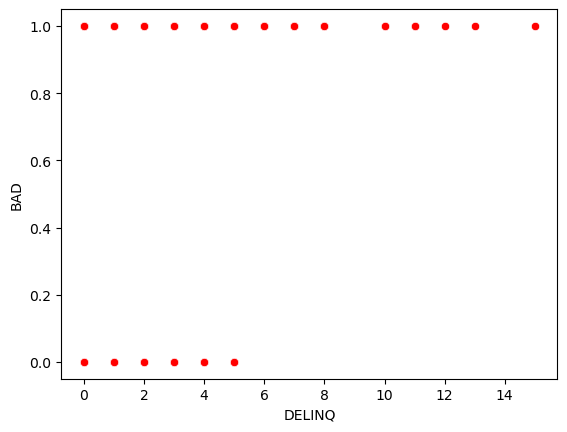

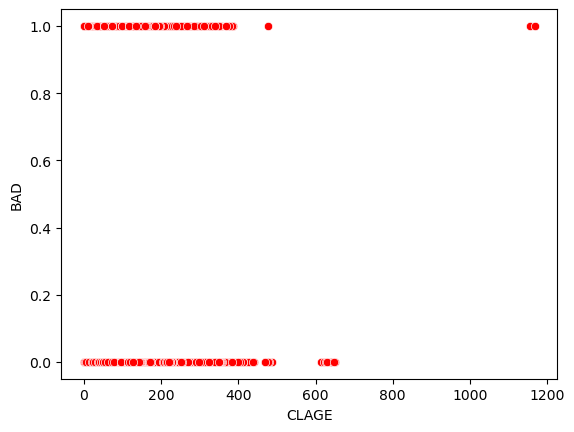

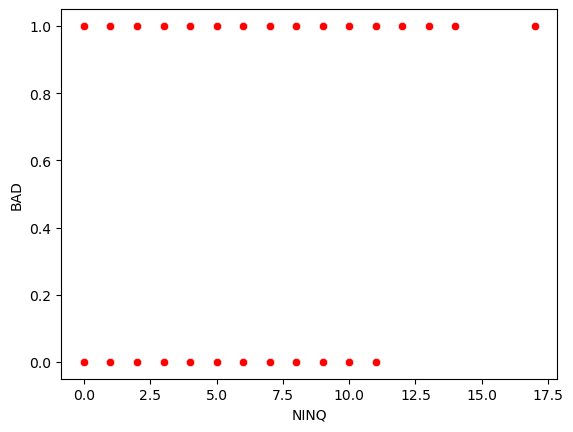

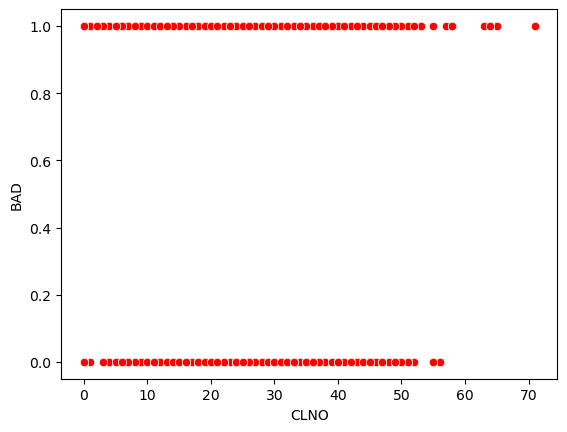

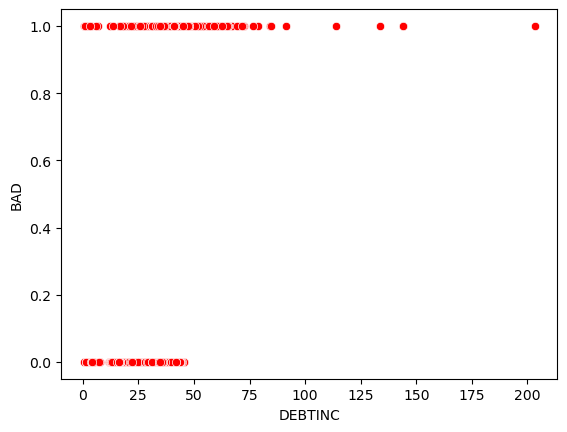

In [368]:
for col in df.columns:
    sns.scatterplot(x = df[col], y = df["BAD"], color = "r")
    plt.show()

### **NULOS**

In [374]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [375]:
df.shape

(5960, 13)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


NULOS EN LA COLUMNA MORTDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC. Esto lo puedo aplicar tanto a train como a test ya que los modelos no aceptan nulos y porque estamos trabajando a nivel de filas, no usamos toda la población para hacer estimaciones

In [5]:
def procesar_debtinc_nulo(df = pd.DataFrame):
    # Filtrar el DataFrame donde 'DEBTINC' es nulo
    df_filtrado = df[pd.isnull(df['DEBTINC'])]

    # Aplicar la fórmula a las filas filtradas
    df.loc[df['DEBTINC'].isnull(), 'DEBTINC'] = 100 - (df_filtrado["VALUE"] / (df_filtrado["LOAN"] + df_filtrado["MORTDUE"])) * 100

    return df

def procesar_value_nulo(df = pd.DataFrame):
    
    df_filtrado = df[pd.isnull(df['VALUE'])]

    # Aplicar la fórmula a las filas filtradas
    df.loc[df['VALUE'].isnull(), 'VALUE'] = (df_filtrado["LOAN"] + df_filtrado["MORTDUE"])*((100 - df_filtrado["DEBTINC"])/100)

    return df

def procesar_mortdue_nulo(df = pd.DataFrame):
    
    df_filtrado = df[pd.isnull(df['MORTDUE'])]

    # Aplicar la fórmula a las filas filtradas
    df.loc[df['MORTDUE'].isnull(), 'MORTDUE'] = df_filtrado['LOAN'] + df_filtrado['VALUE'] - df_filtrado['LOAN'] * (100 / (100 - df_filtrado['DEBTINC']))

    return df

In [6]:
df[pd.isna(df["DEBTINC"])] # HAY NULOS, LOS TRANSFORMAMOS

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,1,72300,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN
5932,1,76500,38206.0,90000.0,DebtCon,Other,12.0,0.0,0.0,134.900000,0.0,26.0,NaN
5933,1,77200,83962.0,215000.0,HomeImp,Self,8.0,1.0,2.0,71.533132,3.0,14.0,NaN
5935,0,78400,13900.0,102910.0,HomeImp,NaN,27.0,0.0,1.0,138.000000,0.0,14.0,NaN


In [7]:
df = procesar_debtinc_nulo(df)

In [8]:
df[pd.isna(df["LOAN"])] # NO HAY NULOS

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [9]:
df[pd.isna(df["VALUE"])] # HAY NULOS, LOS TRANSFORMAMOS

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000,22608.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
23,1,2400,18000.0,NaN,HomeImp,Mgr,22.0,NaN,2.0,121.733333,0.0,10.0,NaN
57,1,3200,23159.0,NaN,HomeImp,Mgr,20.0,NaN,2.0,117.805748,0.0,9.0,0.524499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,50000,26976.0,NaN,DebtCon,Mgr,8.3,1.0,0.0,111.600000,1.0,6.0,NaN
5818,1,50000,106000.0,NaN,DebtCon,Mgr,0.8,0.0,2.0,252.633333,3.0,32.0,NaN
5822,1,50000,30338.0,NaN,DebtCon,Mgr,8.0,0.0,0.0,91.431005,0.0,5.0,35.084001
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


In [10]:
df = procesar_value_nulo(df)

In [11]:
df[pd.isna(df["MORTDUE"])] # HAY NULOS, LOS TRANSFORMAMOS

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN
24,1,2400,NaN,17180.0,HomeImp,Other,NaN,0.0,0.0,14.566667,3.0,4.0,NaN
40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
41,1,3000,NaN,33000.0,HomeImp,Other,1.0,0.0,1.0,23.300000,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,53700,NaN,84205.0,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.639940
5883,0,53800,NaN,81322.0,HomeImp,Self,9.0,0.0,0.0,171.447555,0.0,22.0,24.709060
5884,0,53900,NaN,91309.0,HomeImp,Other,NaN,0.0,0.0,349.795748,0.0,6.0,22.061330
5930,1,72300,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN


In [12]:
df = procesar_mortdue_nulo(df)

In [13]:
df[df["DEBTINC"] < 0] = 0

In [14]:
# Estos nulos aunque sean morosos o no, no sabemos que cantidad de crédito querrá pedir, ni su hipoteca, así que a todo le pondremos 0
# Ya que independientemente de que no pida crédito, no tenga hipoteca puede ser moroso o no
len(df[((pd.isna(df['LOAN'])) & (pd.isna(df['VALUE']))) |
    ((pd.isna(df['LOAN'])) & (pd.isna(df['MORTDUE']))) |
    ((pd.isna(df['LOAN'])) & (pd.isna(df['DEBTINC']))) |
    ((pd.isna(df['VALUE'])) & (pd.isna(df['MORTDUE']))) |
    ((pd.isna(df['VALUE'])) & (pd.isna(df['DEBTINC']))) |
    ((pd.isna(df['DEBTINC'])) & (pd.isna(df['MORTDUE'])))])

190

In [15]:
df[((pd.isna(df['LOAN'])) & (pd.isna(df['VALUE']))) |
    ((pd.isna(df['LOAN'])) & (pd.isna(df['MORTDUE']))) |
    ((pd.isna(df['LOAN'])) & (pd.isna(df['DEBTINC']))) |
    ((pd.isna(df['VALUE'])) & (pd.isna(df['MORTDUE']))) |
    ((pd.isna(df['VALUE'])) & (pd.isna(df['DEBTINC']))) |
    ((pd.isna(df['DEBTINC'])) & (pd.isna(df['MORTDUE'])))] = 0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5765 non-null   object 
 5   JOB      5732 non-null   object 
 6   YOJ      5533 non-null   float64
 7   DEROG    5385 non-null   float64
 8   DELINQ   5485 non-null   float64
 9   CLAGE    5733 non-null   float64
 10  NINQ     5546 non-null   float64
 11  CLNO     5800 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


A partir de aquí hay que separar X e y y X_train y X_test, porque vamos a trabajar con la población para calcular modas y medias, y no podemos entrenar modelos con el test, sino que se entrenan con el train y se aplican al test

In [104]:
X = df.drop("BAD", axis = 1)
y = df["BAD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify= y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (4768, 12), y_train: (4768,)
X_test: (1192, 12),  y_test: (1192,)


In [105]:
len(X_train[pd.isna(X_train["REASON"])]), len(X_test[pd.isna(X_test["REASON"])]) # Hay nuelos en REASON

(148, 47)

In [106]:
# Pero los nulos de REASON NO TIENEN NULOS EN LOAN ASÍ QUE LOS RELLENAREMOS CON LA MODA
len(X_train[pd.isna(X_train["REASON"]) & pd.isna(X_train["LOAN"])]), len(X_test[pd.isna(X_test["REASON"]) & pd.isna(X_test["LOAN"])])

(0, 0)

In [107]:
def procesar_reason_nulo(train = pd.DataFrame, test = pd.DataFrame):
    # Calcular la moda de la columna
    moda = train['REASON'].mode()[0]
    train['REASON'].fillna(moda, inplace=True)
    test["REASON"].fillna(moda, inplace=True)

    return train, test

X_train, X_test = procesar_reason_nulo(X_train, X_test)

In [108]:
# HAY REASON QUE SON 0 Y A SU VEZ SON 0 EN LOAN, QUIERE DECIR QUE NO PIDIERON CRÉDITOS
len(X_train[(X_train["REASON"]==0) & (X_train["LOAN"]==0)]), len(X_test[(X_test["REASON"]==0) & (X_test["LOAN"]==0)])

(990, 212)

In [109]:
# Coincide con la cantidad que hay de ceros en reason y que no tiene porque ser cero en loan (y viceversa) lo que puede implicar que todos los ceros en reason son ceros en loan, lo que significaría que no pidieron crédito
len(X_train[(X_train["REASON"]==0) | (X_train["LOAN"]==0)]), len(X_test[(X_test["REASON"]==0) | (X_test["LOAN"]==0)])

(990, 212)

In [110]:
X_train[(X_train["REASON"]==0)][["LOAN", "REASON"]] # Efectivamente, así que rellenaremos esos ceros con  la palabra "ninguna"

,LOAN,REASON
180,0,0
324,0,0
1162,0,0
153,0,0
1468,0,0
...,...,...
5818,0,0
573,0,0
5301,0,0
5715,0,0


In [111]:
# Entonces podemos rellenar esos ceros por la palabra "nada" directamente
def procesar_reason_ceros(train, test):
    train['REASON'] = train['REASON'].replace(0, 'Ninguno')
    test['REASON'] = test['REASON'].replace(0, 'Ninguno')

    return train, test

X_train, X_test = procesar_reason_ceros(X_train, X_test)

In [112]:
# Vemos si queda algun nulo:
len(X_train[pd.isna(X_train["REASON"])]), len(X_train[pd.isna(X_train["REASON"])])

(0, 0)

In [113]:
# Vemos si queda algun 0 en reason:
len(X_train[X_train["REASON"]== 0]), len(X_train[(X_train["REASON"])== 0]) 

(0, 0)

In [114]:
# Ahora podemos aplicar label encoder al train y al test en la columna reason
# Entrenamos el objeto LabelEncoder con X_train para transformas la columna reason de X_train y de X_test
reason_labelEncoding = LabelEncoder()
reason_labelEncoding.fit(X_train["REASON"].values)

# Transformamos la columna del train y del test en funcion de lo que aprendió del X_train
reason = reason_labelEncoding.transform(X_train["REASON"].values)
reason_test = reason_labelEncoding.transform(X_test["REASON"].values)

X_train["REASON"] = reason
X_test["REASON"] = reason_test

In [115]:
X_train.info() #Quedan nulos en JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO

<class 'pandas.core.frame.DataFrame'>
Index: 4768 entries, 3855 to 281
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     4768 non-null   int64  
 1   MORTDUE  4768 non-null   float64
 2   VALUE    4768 non-null   float64
 3   REASON   4768 non-null   int32  
 4   JOB      4586 non-null   object 
 5   YOJ      4420 non-null   float64
 6   DEROG    4306 non-null   float64
 7   DELINQ   4388 non-null   float64
 8   CLAGE    4587 non-null   float64
 9   NINQ     4432 non-null   float64
 10  CLNO     4641 non-null   float64
 11  DEBTINC  4768 non-null   float64
dtypes: float64(9), int32(1), int64(1), object(1)
memory usage: 465.6+ KB


In [116]:
len(X_train[pd.isna(X_train["JOB"])]), len(X_test[pd.isna(X_test["JOB"])]) # HAY NULOS EN JOB

(182, 46)

In [117]:
# Los que tengan nulos en su trabajo y en años trabajados vamos a poner que no trabajan en la columna JOB
len(X_train[pd.isna(X_train["JOB"]) & pd.isna(X_train["YOJ"])]), len(X_test[pd.isna(X_test["JOB"]) & pd.isna(X_test["YOJ"])])
# Vemos que solo algunos son que no han trabajado nunca

(64, 14)

In [118]:
len(X_train[X_train["JOB"]== 0]), len(X_test[X_test["JOB"]== 0]) # HAY NULOS EN JOB

(990, 212)

In [119]:
# Los que tienen 0 en job parece ser que coinciden con los que tienen 0 en yoj, que no han trabajado nunca
len(X_train[(X_train["JOB"]==0) & (X_train["YOJ"]==0)]), len(X_test[(X_test["JOB"]==0) & (X_test["YOJ"]==0)])

(990, 212)

In [120]:
X_train[(X_train["JOB"]==0)][["JOB", "YOJ"]] # Efectivamente podemos deducir que no trabajan

,JOB,YOJ
180,0,0.0
324,0,0.0
1162,0,0.0
153,0,0.0
1468,0,0.0
...,...,...
5818,0,0.0
573,0,0.0
5301,0,0.0
5715,0,0.0


In [121]:
# En esta función solo cambiaremos los nulos que no trabajan
def procesar_job_no_trabajan(train, test):
    train.loc[pd.isnull(train['JOB']) & pd.isnull(train['YOJ']), "JOB"] = 'Ninguno'
    test.loc[pd.isnull(test['JOB']) & pd.isnull(test['YOJ']), "JOB"] = 'Ninguno'
    
    train['JOB'] = train['JOB'].replace(0, 'Ninguno')
    test['JOB'] = test['JOB'].replace(0, 'Ninguno')
    
    return train, test

In [122]:
X_train, X_test = procesar_job_no_trabajan(X_train, X_test)

In [123]:
# Pero sigue habiendo nulos en JOB que no tienen nulos en YOJ, por lo que tendremos que rellenar con la moda, una vez ya hemos rellenado correctamente los que no trabajan
def procesar_job_nulos(train = pd.DataFrame, test = pd.DataFrame):
    # Calcular la moda de la columna
    moda = train['JOB'].mode()[0]
    train['JOB'].fillna(moda, inplace=True)
    test["JOB"].fillna(moda, inplace=True)

    return train, test

X_train, X_test = procesar_job_nulos(X_train, X_test)

In [124]:
# YA NO HAY NULOS EN JOB
len(X_train[pd.isna(X_train["JOB"])]), len(X_test[pd.isna(X_test["JOB"])])

(0, 0)

In [125]:
# Si hay nulo en YOJ y en JOB hay un "Ninguno", entonces YOJ es 0:
X_train[(pd.isna(X_train["YOJ"])) & (X_train["YOJ"] == "Ninguno")] # Como no hay ninguna fila que cumpla esta condición
# Significa que YOJ tendrémos que poner la media de años trabajados

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [126]:
def procesar_yoj_nulo(train, test):
    media = train["YOJ"].mean()
    train['YOJ'].fillna(media, inplace=True)
    test["YOJ"].fillna(media, inplace=True)

    return train, test

X_train, X_test = procesar_yoj_nulo(X_train, X_test)

In [127]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 4630 to 1874
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     1192 non-null   int64  
 1   MORTDUE  1192 non-null   float64
 2   VALUE    1192 non-null   float64
 3   REASON   1192 non-null   int32  
 4   JOB      1192 non-null   object 
 5   YOJ      1192 non-null   float64
 6   DEROG    1079 non-null   float64
 7   DELINQ   1097 non-null   float64
 8   CLAGE    1146 non-null   float64
 9   NINQ     1114 non-null   float64
 10  CLNO     1159 non-null   float64
 11  DEBTINC  1192 non-null   float64
dtypes: float64(9), int32(1), int64(1), object(1)
memory usage: 116.4+ KB


In [128]:
job_labelEncoding = LabelEncoder()
job_labelEncoding.fit(X_train["JOB"].values)

# Transformamos la columna
job = job_labelEncoding.transform(X_train["JOB"].values)
job_test = job_labelEncoding.transform(X_test["JOB"].values)

X_train["JOB"] = job
X_test["JOB"] = job_test

In [130]:
# si hay nulo en clno (numero de lineas de crédito), en ninq (consultas), clage (antigüedad) y en delinq (lineas morosas), quiere decir que derog y todas las anteriores es 0:
def nulos_en_varias(train, test):

    c1 =pd.isnull(train['CLNO'])
    c2 =pd.isnull(train['NINQ'])
    c3 =pd.isnull(train['CLAGE'])
    c4 =pd.isnull(train['DELINQ'])
    
    train.loc[ c1 & c2 & c3 & c4 , ["DEROG", "CLNO", "NINQ", "CLAGE", "DELINQ"]] = 0

    c1 =pd.isnull(test['CLNO'])
    c2 =pd.isnull(test['NINQ'])
    c3 =pd.isnull(test['CLAGE'])
    c4 =pd.isnull(test['DELINQ'])
    
    test.loc[ c1 & c2 & c3 & c4 , ["DEROG", "CLNO", "NINQ", "CLAGE", "DELINQ"]] = 0

    return train, test

X_train, X_test = nulos_en_varias(X_train, X_test)

In [131]:
# HAY NULOS EN NUMERO DE CONSULTAS, PARA GENTE QUE TIENE LINEAS DE CRÉTIDO ASÍ QUE VAMOS A RELLENAR CON LA MEDIA DE CONSULTAS:
X_train[pd.isna(X_train["NINQ"])][["NINQ", "CLNO"]]

,NINQ,CLNO
3855,NaN,51.0
391,NaN,12.0
4278,NaN,13.0
4817,NaN,12.0
4697,NaN,12.0
...,...,...
4071,NaN,24.0
1039,NaN,7.0
231,NaN,18.0
3720,NaN,52.0


In [132]:
def procesar_ninq_nulos(train, test):
    
    media = train['NINQ'].mean()
    train['NINQ'].fillna(media, inplace=True)
    test["NINQ"].fillna(media, inplace=True)

    return train, test

X_train, X_test = procesar_ninq_nulos(X_train, X_test)

In [133]:
len(X_train[(pd.isna(X_train["CLAGE"]))].index)

54

In [134]:
# VEAMOS SI HAY ANTIGUEDADES (CLAGE) NULAS CON LINEAS DE CREDITO DISTINTAS DE 0: 
# estas las rellenaremos con la media de antiguedades
# La que sean 0 en CLNO serán 0 en CLAGE también
X_train[(pd.isna(X_train["CLAGE"])) & (X_train["CLNO"] == 0)][["CLAGE", "CLNO"]]

,CLAGE,CLNO
5570,NaN,0.0
2078,NaN,0.0
5566,NaN,0.0
4854,NaN,0.0
5608,NaN,0.0
4883,NaN,0.0
5556,NaN,0.0
552,NaN,0.0
5637,NaN,0.0
3690,NaN,0.0


In [135]:
def procesar_clage_nulo(train, test):
    # PRIMERO RELLENO LOS NULOS QUE SERÁN 0
    train.loc[(pd.isna(train["CLAGE"])) & (train["CLNO"] == 0), ["CLAGE"]] = 0
    test.loc[(pd.isna(test["CLAGE"])) & (test["CLNO"] == 0), ["CLAGE"]] = 0
    # LUEGO LOS NULOS QUE SERÁN LA MEDIA
    media = train["CLAGE"].mean()
    train['CLAGE'].fillna(media, inplace=True)
    test["CLAGE"].fillna(media, inplace=True)

    return train, test

X_train, X_test = procesar_clage_nulo(X_train, X_test)

In [136]:
# SI ES NULO EN DELINQ Y 0 EN CLNO ES 0 EN DELINQ (NO HAY NINGUNO)
# SI ES NULO EN DELINQ Y NO ES 0 EN MORTDUE, DELINQ = MEDIA DE DELINQ EN AQUELLAS QUE MORTDUE ES MENOR DE 100000, EN LAS QUE SON MAYOR OTRA MEDIA
X_train[(pd.isna(X_train["DELINQ"])) & (X_train["MORTDUE"] != 0)] # coincide con la cantidad de nulos de DELINQ

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
391,6400,44968.000000,62747.0,1,3,0.000000,1.0,NaN,101.391445,0.807633,12.0,36.602947
4838,25400,76194.000000,98188.0,0,0,0.000000,NaN,NaN,245.267853,5.000000,23.0,42.138106
5390,31100,73386.000000,108864.0,1,3,5.000000,NaN,NaN,119.539518,10.000000,21.0,42.826601
4697,24800,35302.523304,45167.0,0,3,6.919932,NaN,NaN,84.735618,0.807633,12.0,28.457019
5748,43300,31908.015310,48908.0,0,3,6.919932,5.0,NaN,123.402860,0.807633,19.0,28.192353
...,...,...,...,...,...,...,...,...,...,...,...,...
4071,21300,28463.000000,47537.0,0,3,1.000000,NaN,NaN,317.300625,0.807633,24.0,37.171639
231,5400,47844.000000,52040.0,1,2,8.000000,NaN,NaN,189.034305,0.807633,18.0,24.701136
1010,9400,52598.000000,74747.0,0,0,6.000000,NaN,NaN,129.343824,0.807633,24.0,42.265466
3676,19300,146465.000000,192854.0,0,4,13.000000,NaN,NaN,110.648807,1.000000,23.0,29.975576


In [137]:
def procesar_delinq_nulo(train, test):

    filtro_1 = train["MORTDUE"] < 100000
    filtro_2 = train["MORTDUE"] > 100000
    media_1 = train[filtro_1]["DELINQ"].mean()
    media_2 = train[filtro_2]["DELINQ"].mean()

    train.loc[filtro_1 & pd.isna(train['DELINQ']), 'DELINQ'] = media_1
    train.loc[filtro_2 & pd.isna(train['DELINQ']), 'DELINQ'] = media_2
    
    test.loc[(test["MORTDUE"] < 100000) & pd.isna(test['DELINQ']), 'DELINQ'] = media_1
    test.loc[(test["MORTDUE"] > 100000) & pd.isna(test['DELINQ']), 'DELINQ'] = media_2

    return train, test

X_train, X_test = procesar_delinq_nulo(X_train, X_test)

In [138]:
# ÚLTIMA COLUMNA DEROG:
# Si derog es nulo pero DLINQ no es 0 entonces derog es la media, si dlinq es 0 entonces derog es 0
X_train[(pd.isna(X_train["DEROG"])) & (X_train["DELINQ"]==0)][["DEROG", "DELINQ"]]

,DEROG,DELINQ
3855,NaN,0.0
5725,NaN,0.0
239,NaN,0.0
4257,NaN,0.0
5011,NaN,0.0
365,NaN,0.0
4271,NaN,0.0
127,NaN,0.0
5206,NaN,0.0
2118,NaN,0.0


In [139]:
def procesar_derog_nulo(train, test):
    # PRIMERO LOS QUE SERÁN 0
    train.loc[(pd.isna(train["DEROG"])) & (train["DELINQ"]==0), "DEROG"] = 0
    test.loc[(pd.isna(test["DEROG"])) & (test["DELINQ"]==0), "DEROG"] = 0

    media = train["DEROG"].mean()
    train['DEROG'].fillna(media, inplace=True)
    test["DEROG"].fillna(media, inplace=True)

    return train, test

X_train, X_test = procesar_derog_nulo(X_train, X_test)

In [140]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 4630 to 1874
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     1192 non-null   int64  
 1   MORTDUE  1192 non-null   float64
 2   VALUE    1192 non-null   float64
 3   REASON   1192 non-null   int32  
 4   JOB      1192 non-null   int32  
 5   YOJ      1192 non-null   float64
 6   DEROG    1192 non-null   float64
 7   DELINQ   1192 non-null   float64
 8   CLAGE    1192 non-null   float64
 9   NINQ     1192 non-null   float64
 10  CLNO     1192 non-null   float64
 11  DEBTINC  1192 non-null   float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 111.8 KB


- BAD: 1 = candidato con préstamo incumplido o con mora; 0 = candidato que paga su deuda y no tiene registro negativo
- LOAN: Cantidad de solicitud de préstamo
- MORTDUE: Cantidad adeudada de la hipoteca existente
- VALUE: Valor actual del bien o propiedad
- REASON: DebtCon = consolidación de la deuda; HomeImp = mejoras para el hogar
- JOB: Categorias ocupacionales o profesionales
- YOJ: Años es esu trabajo actual
- DEROG: Número de informes derogados o cancelados importantes
- DELINQ: Número de lineas de crédito morosas
- CLAGE: Antiguedad de la linea de crédito más antigua en meses
- NINQ:Número de consultas crediticas recientes
- CLNO: Número de líneas de crédito
- DEBTINQ: (LOAN + MORTDUE) / VALUE

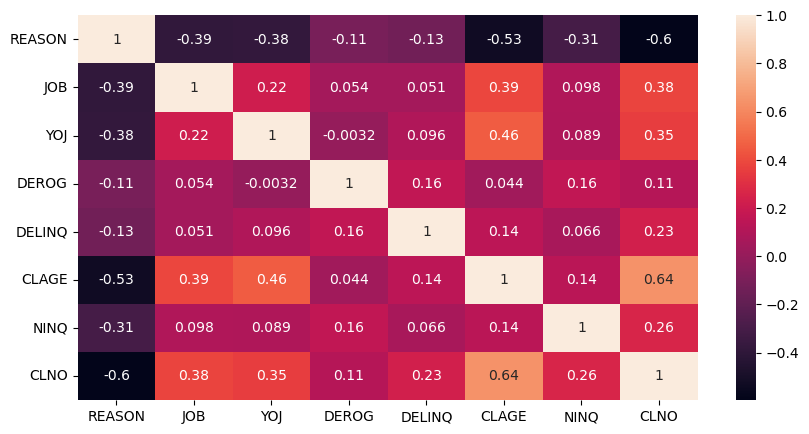

In [141]:
columnas = ["REASON", "JOB", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO"]
plt.figure(figsize = (10, 5))
sns.heatmap(data = X_train[["REASON", "JOB", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO"]].corr(), annot = True)
plt.show()

### MODELOS DE CLASIFICACIÓN SIN NORMALIZAR:

In [145]:
for k in range(1, 60):
    
    # Modelo
    kne = KNeighborsClassifier(n_neighbors = k)
    kne.fit(X_train, y_train)
    
    # Predicciones
    yhat = kne.predict(X_test)
    
    # Metricas
    accuracy = accuracy_score(y_test, yhat)

    if (accuracy > 0.929):
        print(f"k: {k}, Acurracy: {accuracy}")

k: 4, Acurracy: 0.9295302013422819
k: 5, Acurracy: 0.9320469798657718
k: 6, Acurracy: 0.9295302013422819
k: 7, Acurracy: 0.9320469798657718
k: 8, Acurracy: 0.9295302013422819


1. **Jaccard Index:**
   - El índice Jaccard, también conocido como coeficiente de similitud de Jaccard, mide la similitud entre dos conjuntos. En el contexto de la clasificación, se utiliza para evaluar la similitud entre el conjunto de etiquetas reales y el conjunto de etiquetas predichas. Un valor más alto indica una mayor similitud.

2. **Accuracy (Precisión):**
   - La precisión es una métrica que mide la proporción de predicciones correctas en relación con el total de predicciones. Se calcula como `(TP + TN) / (TP + TN + FP + FN)`.

3. **Precision (Precisión):**
   - La precisión se centra en la proporción de instancias positivas predichas correctamente en relación con el total de instancias positivas predichas. Se calcula como `TP / (TP + FP)`.

4. **Recall (Sensibilidad):**
   - La sensibilidad, también conocida como recall o tasa positiva verdadera, mide la proporción de instancias positivas reales que fueron identificadas correctamente por el modelo. Se calcula como `TP / (TP + FN)`.

5. **F1-score:**
   - El F1-score es una medida que combina precision y recall en un solo número. Es útil cuando hay un desequilibrio entre las clases. Se calcula como `2 * (precision * recall) / (precision + recall)`.

Estas métricas son comunes en problemas de clasificación y proporcionan información sobre el rendimiento del modelo desde diferentes perspectivas. Al considerar múltiples métricas, puedes obtener una imagen más completa del rendimiento del modelo en comparación con simplemente observar la precisión.

In [154]:
kne = KNeighborsClassifier(n_neighbors = 5)
kne.fit(X_train, y_train)

# Predicciones
yhat = kne.predict(X_test)

# Metricas
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.520681095554192
Accuracy: 0.9320469798657718
Precisión: 0.9206758525132783
Sensibilidad: 0.5551018350473886
F1-score: 0.5812700849585616


Para identificar el sobreajuste (overfitting) en un modelo de machine learning, dos métricas clave que puedes observar son:

1. **Diferencia entre el Rendimiento en Entrenamiento y en Prueba:**
   - Observar la diferencia entre el rendimiento del modelo en el conjunto de entrenamiento y en el conjunto de prueba puede ser indicativo de sobreajuste. Si el modelo tiene un rendimiento excelente en el conjunto de entrenamiento pero un rendimiento significativamente peor en el conjunto de prueba, es posible que esté sobreajustado. La métrica de precisión (`accuracy`) es comúnmente utilizada para evaluar el rendimiento, pero puedes observar otras métricas como la pérdida, la sensibilidad (`recall`), o el F1-score.

2. **Curva de Aprendizaje:**
   - La curva de aprendizaje muestra cómo evoluciona el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento. Un modelo sobreajustado tiende a tener un rendimiento muy alto en el conjunto de entrenamiento, pero este rendimiento no mejora significativamente a medida que se aumenta el tamaño del conjunto de entrenamiento. En cambio, el rendimiento en el conjunto de prueba puede haberse estancado o incluso haber empeorado. Observar la curva de aprendizaje puede ayudarte a identificar si el modelo se beneficia de más datos o si ha alcanzado su capacidad máxima.

Es importante destacar que evaluar el sobreajuste no se limita a dos métricas específicas, ya que puede depender del problema y del tipo de modelo. Además de las métricas mencionadas, también puedes considerar otras métricas como la sensibilidad (`recall`), la especificidad, y la validación cruzada para obtener una visión más completa del rendimiento del modelo.

En resumen, la observación de la diferencia entre el rendimiento en entrenamiento y prueba, así como el análisis de la curva de aprendizaje, son enfoques clave para identificar el sobreajuste en un modelo de machine learning.

In [155]:
# UNA CACA
logreg=LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

print("Jaccard Index:", jaccard_score(y_test, y_pred, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, y_pred))
print("Precisión:"    , precision_score(y_test, y_pred, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, y_pred, average = "macro"))
print("F1-score:"     , f1_score(y_test, y_pred, average = "macro"))

Jaccard Index: 0.46986794717887154
Accuracy: 0.9194630872483222
Precisión: 0.5627749576988156
Sensibilidad: 0.5074813470457753
F1-score: 0.4989842381786339


In [70]:
# ESTE MODELO PREDICE MUY BIEN LOS NEGATIVOS, PERO LOS POSITIVO SE EQUIVOCA MÁS QUE ACIERTA
gaus = GaussianNB()
gaus.fit(X_train, y_train)
yhat = gaus.predict(X_test)
matriz_confusion = confusion_matrix(y_test, yhat, labels = [0, 1])
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("Matriz confusión:", matriz_confusion)
print("Verdaderos positivos TP:", matriz_confusion[1,1])
print("Verdaderos negativos TN:", matriz_confusion[0,0])
print("Falsos Positivos FP:", matriz_confusion[0,1])
print("Falsos Negativos FN:", matriz_confusion[1,0])

Jaccard Index: 0.47885871784401796
Accuracy: 0.9018456375838926
Precisión: 0.5493102498357738
Sensibilidad: 0.5234623916112119
F1-score: 0.5274697350098089
Matriz confusión: [[1068   34]
 [  83    7]]
Verdadero positivos TP: 7
Verdaderos negativos TN: 1068
Falsos Positivos FP: 34
Falsos Negativos FN: 83


In [81]:
# UNA SUPER CACA!!
centroid = NearestCentroid(metric = "euclidean")
centroid.fit(X_train, y_train)
yhat = centroid.predict(X_test)
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.3153164395896954
Accuracy: 0.5830536912751678
Precisión: 0.49224682751034393
Sensibilidad: 0.47349263964508975
F1-score: 0.4192917881735977


In [157]:
# Se acerca al tipo de modelo que queremos
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
yhat = decision.predict(X_test)
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6847184450773393
Accuracy: 0.9412751677852349
Precisión: 0.7914125909415871
Sensibilidad: 0.7794716676749345
F1-score: 0.7852849143610015


In [158]:
# SE ACERCA MUCHO MAS A LO QUE BUSCAMOS
random = RandomForestClassifier()
random.fit(X_train, y_train)
yhat = random.predict(X_test)
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6746823069403715
Accuracy: 0.9530201342281879
Precisión: 0.9394965277777778
Sensibilidad: 0.7041943940310547
F1-score: 0.7721930243669375


In [159]:
# PUEDE SER CANDIDATO
adaboost = AdaBoostClassifier(n_estimators = 50)
adaboost.fit(X_train, y_train)
yhat = adaboost.predict(X_test)
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6426144355754402
Accuracy: 0.9437919463087249
Precisión: 0.8483229582830065
Sensibilidad: 0.6889997983464409
F1-score: 0.7405656853095286


In [160]:
# ME GUSTA (pero el random y el decision me gustan más)
gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)
yhat = gradient.predict(X_test)
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6639546530686579
Accuracy: 0.950503355704698
Precisión: 0.9155665275158399
Sensibilidad: 0.6977313974591652
F1-score: 0.7617155073981087


In [161]:
# VOTANDO QUÉ MODELO ES MEJOR (vaya mierda)

estimadores = [("kne", kne), ("logreg", logreg), ("random", random), ("gaus", gaus), ("adaboost", adaboost), ("centroid", centroid)]

model = VotingClassifier(estimators = estimadores[:-1],
                             voting = "soft",
                            weights = [1, 1, 1, 1, 1, 1][:-1],
                             n_jobs = -1)

model.fit(X_train, y_train)
yhat = model.predict(X_test)
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:"      , roc_auc_score(y_test, yhat))


Jaccard Index: 0.5080052878965923
Accuracy: 0.9295302013422819
Precisión: 0.8653130287648054
Sensibilidad: 0.5435370034281105
F1-score: 0.5616112084063047
ROC AUC: 0.5435370034281105


### **SAMPLING AL TRAIN** Probemos los mismos modelos con el sampling hecho

In [162]:
oversampling = SMOTE()
X_balanceado, y_balanceado = oversampling.fit_resample(X_train, y_train) # Se obtienen nuevos X e y

In [163]:
# HA EMPEORADO, INCREIBLE
decision_balanceado = DecisionTreeClassifier()
decision_balanceado.fit(X_balanceado, y_balanceado)
yhat = decision_balanceado.predict(X_test)
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6602998081487985
Accuracy: 0.9312080536912751
Precisión: 0.7534977427899863
Sensibilidad: 0.7740270215769308
F1-score: 0.763244583963105


In [510]:
# HAY QUE NORMALIZAR

list_accuracy = list()

for radio in np.arange(0, 3, 0.01):
    
    try:
        # Modelo
        RADIUS = RadiusNeighborsClassifier(radius = radio)
        RADIUS.fit(X_train, y_train)

        # Predicciones
        yhat = RADIUS.predict(X_test)

        # Metricas
        accuracy = accuracy_score(y_test, yhat)

        list_accuracy.append([radio, accuracy])
        #if accuracy > 0.95:
        print(f"radio: {radio}, Acurracy. {accuracy}")
        
    except:
        pass

In [512]:
RADIUS = RadiusNeighborsClassifier(radius = 0.5)
RADIUS.fit(X_train, y_train)
yhat = RADIUS.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, yhat)}")

ValueError: No neighbors found for test samples array([   0,    1,    3,    4,    6,    7,    8,    9,   10,   11,   12,
         13,   15,   16,   17,   18,   19,   20,   21,   22,   25,   26,
         27,   28,   29,   30,   33,   34,   35,   36,   37,   38,   39,
         40,   41,   43,   44,   45,   46,   48,   49,   50,   51,   53,
         54,   55,   56,   58,   59,   60,   61,   62,   64,   65,   66,
         67,   71,   72,   73,   74,   75,   76,   78,   80,   81,   82,
         83,   85,   86,   87,   88,   90,   91,   93,   94,   96,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  109,  110,
        111,  112,  113,  114,  116,  117,  120,  121,  122,  123,  124,
        125,  127,  128,  129,  130,  132,  133,  134,  136,  137,  138,
        139,  140,  142,  143,  144,  145,  146,  147,  148,  149,  150,
        151,  152,  154,  155,  156,  157,  158,  159,  160,  161,  162,
        163,  164,  165,  166,  167,  168,  169,  170,  171,  172,  173,
        174,  175,  176,  177,  178,  179,  180,  181,  182,  183,  184,
        185,  186,  187,  188,  189,  191,  193,  194,  195,  196,  197,
        198,  199,  200,  201,  202,  203,  204,  206,  207,  208,  210,
        212,  213,  215,  216,  217,  218,  219,  220,  221,  222,  224,
        227,  228,  229,  231,  232,  235,  237,  238,  239,  241,  243,
        245,  246,  247,  249,  250,  251,  252,  253,  254,  255,  256,
        257,  258,  259,  260,  261,  262,  263,  265,  266,  267,  268,
        270,  271,  272,  273,  274,  277,  278,  279,  282,  283,  284,
        285,  286,  287,  289,  290,  291,  292,  293,  294,  295,  296,
        297,  298,  300,  301,  302,  303,  304,  305,  307,  308,  309,
        310,  311,  312,  313,  314,  315,  317,  318,  319,  320,  321,
        322,  323,  324,  325,  326,  327,  328,  329,  330,  331,  332,
        333,  334,  335,  336,  339,  340,  341,  342,  344,  345,  346,
        347,  348,  349,  350,  351,  352,  354,  355,  356,  357,  358,
        359,  360,  361,  362,  363,  364,  365,  366,  369,  370,  371,
        372,  373,  374,  375,  379,  381,  383,  384,  385,  386,  387,
        388,  390,  391,  392,  393,  394,  396,  397,  398,  399,  400,
        401,  403,  404,  405,  407,  409,  410,  411,  412,  413,  415,
        416,  417,  418,  419,  420,  421,  422,  423,  424,  425,  426,
        428,  430,  432,  433,  434,  435,  436,  437,  438,  439,  440,
        441,  443,  444,  445,  446,  447,  450,  451,  452,  453,  454,
        455,  458,  459,  461,  463,  464,  465,  466,  467,  468,  469,
        471,  472,  473,  474,  475,  476,  477,  478,  479,  480,  481,
        482,  483,  484,  485,  486,  487,  488,  489,  490,  492,  493,
        494,  496,  498,  499,  500,  502,  503,  504,  505,  506,  507,
        508,  509,  510,  511,  512,  513,  515,  516,  517,  518,  519,
        520,  521,  522,  524,  525,  526,  528,  529,  530,  532,  533,
        534,  535,  536,  537,  538,  539,  541,  542,  543,  544,  545,
        547,  548,  549,  550,  552,  553,  554,  555,  556,  557,  558,
        559,  561,  563,  564,  565,  566,  567,  568,  569,  570,  571,
        573,  574,  575,  576,  577,  578,  579,  580,  581,  582,  583,
        584,  585,  586,  587,  589,  590,  591,  592,  593,  594,  595,
        596,  597,  599,  600,  601,  602,  603,  604,  605,  606,  607,
        608,  609,  610,  611,  612,  613,  614,  616,  617,  618,  619,
        620,  621,  622,  623,  624,  626,  629,  630,  633,  634,  635,
        636,  637,  639,  640,  641,  642,  643,  644,  645,  646,  647,
        648,  649,  650,  651,  652,  654,  656,  657,  658,  659,  660,
        662,  663,  664,  665,  666,  669,  670,  671,  672,  673,  674,
        675,  676,  677,  678,  680,  681,  682,  683,  685,  688,  689,
        690,  691,  692,  693,  694,  695,  696,  698,  699,  700,  701,
        702,  704,  705,  706,  709,  711,  712,  714,  715,  716,  717,
        718,  719,  720,  721,  722,  724,  725,  727,  728,  730,  731,
        733,  734,  735,  736,  737,  738,  739,  740,  741,  742,  744,
        746,  749,  750,  752,  753,  754,  755,  756,  757,  758,  760,
        761,  762,  764,  765,  766,  767,  768,  769,  770,  771,  772,
        773,  774,  775,  776,  778,  779,  783,  784,  785,  786,  787,
        788,  789,  790,  791,  792,  793,  794,  795,  796,  797,  798,
        799,  800,  801,  802,  803,  804,  805,  806,  807,  808,  809,
        810,  813,  814,  815,  816,  817,  818,  819,  820,  821,  822,
        824,  825,  826,  827,  828,  829,  830,  831,  832,  833,  834,
        835,  836,  837,  839,  840,  841,  842,  843,  844,  845,  846,
        847,  848,  849,  850,  852,  853,  854,  855,  856,  857,  858,
        859,  863,  864,  865,  867,  868,  871,  872,  873,  874,  875,
        876,  878,  879,  880,  881,  882,  883,  885,  886,  887,  888,
        891,  892,  894,  895,  896,  897,  899,  900,  901,  902,  904,
        905,  906,  907,  908,  909,  910,  911,  914,  915,  916,  917,
        918,  919,  920,  921,  922,  923,  924,  925,  926,  929,  930,
        931,  932,  933,  934,  935,  936,  937,  938,  939,  941,  942,
        943,  944,  945,  946,  947,  948,  950,  951,  954,  955,  956,
        957,  958,  959,  960,  961,  962,  963,  964,  965,  966,  967,
        968,  969,  970,  971,  972,  973,  974,  975,  977,  978,  979,
        980,  981,  982,  984,  985,  986,  987,  988,  989,  990,  991,
        992,  993,  994,  995,  998,  999, 1000, 1002, 1003, 1005, 1006,
       1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017,
       1019, 1020, 1024, 1026, 1027, 1028, 1031, 1032, 1033, 1034, 1035,
       1036, 1037, 1038, 1039, 1040, 1042, 1043, 1045, 1046, 1048, 1049,
       1050, 1051, 1053, 1054, 1056, 1058, 1059, 1062, 1063, 1065, 1066,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1076, 1078, 1080,
       1081, 1082, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093,
       1094, 1095, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1107,
       1108, 1110, 1111, 1113, 1115, 1116, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1127, 1128, 1130, 1131, 1132, 1133, 1134, 1135,
       1136, 1137, 1138, 1139, 1140, 1141, 1142, 1144, 1145, 1146, 1147,
       1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1157, 1158, 1159,
       1160, 1163, 1164, 1165, 1166, 1168, 1169, 1170, 1171, 1173, 1174,
       1175, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1185, 1186, 1190,
       1191], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.